# Final Project

## Bath Soap Dataset

### 

In [119]:
import pandas as pd
import numpy as np 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram,linkage
import matplotlib.pyplot as plt 

data = pd.read_csv("BathSoap.csv")
data.head()

,Household,Demographics,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65,Unnamed: 66
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Member id,SEC,FEH,MT,SEX,AGE,EDU,HS,CHILD,CS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1010010,4,3,10,1,4,4,2,4,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1010020,3,2,10,2,2,4,4,2,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1014020,2,3,10,2,4,5,6,4,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Observe our data contains a substantial amount of missing data, especially in the later columns. We will need to do some processing of the data before we can begin our analysis. 

In [120]:
print(data.shape)
print(data.isna().sum())

(4888, 67)
Household       4287
Demographics    4287
Unnamed: 2      4287
Unnamed: 3      4287
Unnamed: 4      4287
                ... 
Unnamed: 62     4888
Unnamed: 63     4888
Unnamed: 64     4888
Unnamed: 65     4888
Unnamed: 66     4888
Length: 67, dtype: int64


### Our data contains 4,888 records, of which a substantial amount are missing most if not all of the records. We will go ahead and remove the data that is missing from the dataset as there is too much to impute new values. 

In [121]:
data = data.dropna(axis=1,how="all")
data.head()

,Household,Demographics,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Member id,SEC,FEH,MT,SEX,AGE,EDU,HS,CHILD,CS,...,PropCat 6,PropCat 7,PropCat 8,PropCat 9,PropCat 10,PropCat 11,PropCat 12,PropCat 13,PropCat 14,PropCat 15
2,1010010,4,3,10,1,4,4,2,4,1,...,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,2.8%,0.0%,13.1%,34.0%
3,1010020,3,2,10,2,2,4,4,2,1,...,34.7%,2.7%,1.6%,1.4%,0.0%,5.9%,0.0%,0.0%,8.1%,0.0%
4,1014020,2,3,10,2,4,5,6,4,1,...,12.1%,3.4%,1.1%,0.9%,0.0%,0.0%,1.6%,0.0%,56.2%,0.3%


In [122]:
data = data.dropna(axis=0,how="all")
data.head()

,Household,Demographics,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45
1,Member id,SEC,FEH,MT,SEX,AGE,EDU,HS,CHILD,CS,...,PropCat 6,PropCat 7,PropCat 8,PropCat 9,PropCat 10,PropCat 11,PropCat 12,PropCat 13,PropCat 14,PropCat 15
2,1010010,4,3,10,1,4,4,2,4,1,...,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,2.8%,0.0%,13.1%,34.0%
3,1010020,3,2,10,2,2,4,4,2,1,...,34.7%,2.7%,1.6%,1.4%,0.0%,5.9%,0.0%,0.0%,8.1%,0.0%
4,1014020,2,3,10,2,4,5,6,4,1,...,12.1%,3.4%,1.1%,0.9%,0.0%,0.0%,1.6%,0.0%,56.2%,0.3%
5,1014030,4,0,0,0,4,0,0,5,0,...,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,60.0%,0.0%


In [123]:
data.isna().sum()

Household                       1
Demographics                    1
Unnamed: 2                      1
Unnamed: 3                      1
Unnamed: 4                      1
Unnamed: 5                      1
Unnamed: 6                      1
Unnamed: 7                      1
Unnamed: 8                      1
Unnamed: 9                      1
Unnamed: 10                     1
Purchase Summary                1
Unnamed: 12                     1
Unnamed: 13                     0
Unnamed: 14                     1
Unnamed: 15                     1
Unnamed: 16                     1
Unnamed: 17                     1
Unnamed: 18                     1
Unnamed: 19                     1
Unnamed: 20                     1
Unnamed: 21                     1
Brand wise Volume %             1
Unnamed: 23                     1
Unnamed: 24                     1
Unnamed: 25                     1
Unnamed: 26                     1
Unnamed: 27                     1
Unnamed: 28                     1
Unnamed: 29   

In [124]:
data = data.dropna()
data.columns = data.iloc[0]
data = data[1:]
data.head()

1,Member id,SEC,FEH,MT,SEX,AGE,EDU,HS,CHILD,CS,...,PropCat 6,PropCat 7,PropCat 8,PropCat 9,PropCat 10,PropCat 11,PropCat 12,PropCat 13,PropCat 14,PropCat 15
2,1010010,4,3,10,1,4,4,2,4,1,...,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,2.8%,0.0%,13.1%,34.0%
3,1010020,3,2,10,2,2,4,4,2,1,...,34.7%,2.7%,1.6%,1.4%,0.0%,5.9%,0.0%,0.0%,8.1%,0.0%
4,1014020,2,3,10,2,4,5,6,4,1,...,12.1%,3.4%,1.1%,0.9%,0.0%,0.0%,1.6%,0.0%,56.2%,0.3%
5,1014030,4,0,0,0,4,0,0,5,0,...,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,60.0%,0.0%
6,1014190,4,1,10,2,3,4,4,3,1,...,0.0%,0.0%,4.8%,0.0%,0.0%,0.0%,0.0%,0.0%,14.5%,0.0%


In [125]:
data.set_index("Member id",inplace=True)
print("Shape: \n",data.shape)
print(data.isna().sum())

data.head()


Shape: 
 (600, 45)
1
SEC                      0
FEH                      0
MT                       0
SEX                      0
AGE                      0
EDU                      0
HS                       0
CHILD                    0
CS                       0
Affluence Index          0
No. of Brands            0
Brand Runs               0
Total Volume             0
No. of  Trans            0
Value                    0
Trans / Brand Runs       0
Vol/Tran                 0
Avg. Price               0
Pur Vol No Promo - %     0
Pur Vol Promo 6 %        0
Pur Vol Other Promo %    0
Br. Cd. 57, 144          0
Br. Cd. 55               0
Br. Cd. 272              0
Br. Cd. 286              0
Br. Cd. 24               0
Br. Cd. 481              0
Br. Cd. 352              0
Br. Cd. 5                0
Others 999               0
Pr Cat 1                 0
Pr Cat 2                 0
Pr Cat 3                 0
Pr Cat 4                 0
PropCat 5                0
PropCat 6                0
PropCat

1,SEC,FEH,MT,SEX,AGE,EDU,HS,CHILD,CS,Affluence Index,...,PropCat 6,PropCat 7,PropCat 8,PropCat 9,PropCat 10,PropCat 11,PropCat 12,PropCat 13,PropCat 14,PropCat 15
Member id,,,,,,,,,,,,,,,,,,,,,
1010010,4,3,10,1,4,4,2,4,1,2,...,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,2.8%,0.0%,13.1%,34.0%
1010020,3,2,10,2,2,4,4,2,1,19,...,34.7%,2.7%,1.6%,1.4%,0.0%,5.9%,0.0%,0.0%,8.1%,0.0%
1014020,2,3,10,2,4,5,6,4,1,23,...,12.1%,3.4%,1.1%,0.9%,0.0%,0.0%,1.6%,0.0%,56.2%,0.3%
1014030,4,0,0,0,4,0,0,5,0,0,...,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,60.0%,0.0%
1014190,4,1,10,2,3,4,4,3,1,10,...,0.0%,0.0%,4.8%,0.0%,0.0%,0.0%,0.0%,0.0%,14.5%,0.0%


### We now have a dataframe that is clear of missing values. We also recognized the first record contained the column names, so we took this record and reassigned it to the column names. We now have a dataset of 600 records and 45 variables with the member id acting as our index. We are ready to begin looking into the analysis. 

### One thing we might want to do first, however, is to get a better understanding of the features to help us as we begin to build clusters. According to the book we essentially have six macro-sections within the data: we have demographics, purchase summary over period, purchase within promotion, brandwise purchase, price categorywise purchase, and selling propositionwise purchase. Within these groups we have a total of 45 different features. Let's look at all the features. 

In [126]:
features = data.columns
features

Index(['SEC', 'FEH', 'MT', 'SEX', 'AGE', 'EDU', 'HS', 'CHILD', 'CS',
       'Affluence Index', 'No. of Brands', 'Brand Runs', 'Total Volume',
       'No. of  Trans', 'Value', 'Trans / Brand Runs', 'Vol/Tran',
       'Avg. Price ', 'Pur Vol No Promo - %', 'Pur Vol Promo 6 %',
       'Pur Vol Other Promo %', 'Br. Cd. 57, 144', 'Br. Cd. 55', 'Br. Cd. 272',
       'Br. Cd. 286', 'Br. Cd. 24', 'Br. Cd. 481', 'Br. Cd. 352', 'Br. Cd. 5',
       'Others 999', 'Pr Cat 1', 'Pr Cat 2', 'Pr Cat 3', 'Pr Cat 4',
       'PropCat 5', 'PropCat 6', 'PropCat 7', 'PropCat 8', 'PropCat 9',
       'PropCat 10', 'PropCat 11', 'PropCat 12', 'PropCat 13', 'PropCat 14',
       'PropCat 15'],
      dtype='object', name=1)

### Above we see all our column names. We recognize that much of the data in higher column numbers are strings, which we will need to convert to floats in order to standardize the data. 

In [127]:
for i in data.columns:
    if data[i].dtypes == "object":
        data[i] = data[i].str.rstrip("%").astype("float") / 100
data.head()

1,SEC,FEH,MT,SEX,AGE,EDU,HS,CHILD,CS,Affluence Index,...,PropCat 6,PropCat 7,PropCat 8,PropCat 9,PropCat 10,PropCat 11,PropCat 12,PropCat 13,PropCat 14,PropCat 15
Member id,,,,,,,,,,,,,,,,,,,,,
1010010,0.04,0.03,0.1,0.01,0.04,0.04,0.02,0.04,0.01,0.02,...,0.000,0.000,0.000,0.000,0.0,0.000,0.028,0.0,0.131,0.340
1010020,0.03,0.02,0.1,0.02,0.02,0.04,0.04,0.02,0.01,0.19,...,0.347,0.027,0.016,0.014,0.0,0.059,0.000,0.0,0.081,0.000
1014020,0.02,0.03,0.1,0.02,0.04,0.05,0.06,0.04,0.01,0.23,...,0.121,0.034,0.011,0.009,0.0,0.000,0.016,0.0,0.562,0.003
1014030,0.04,0.00,0.0,0.00,0.04,0.00,0.00,0.05,0.00,0.00,...,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.0,0.600,0.000
1014190,0.04,0.01,0.1,0.02,0.03,0.04,0.04,0.03,0.01,0.10,...,0.000,0.000,0.048,0.000,0.0,0.000,0.000,0.0,0.145,0.000


<AxesSubplot: xlabel='1', ylabel='1'>

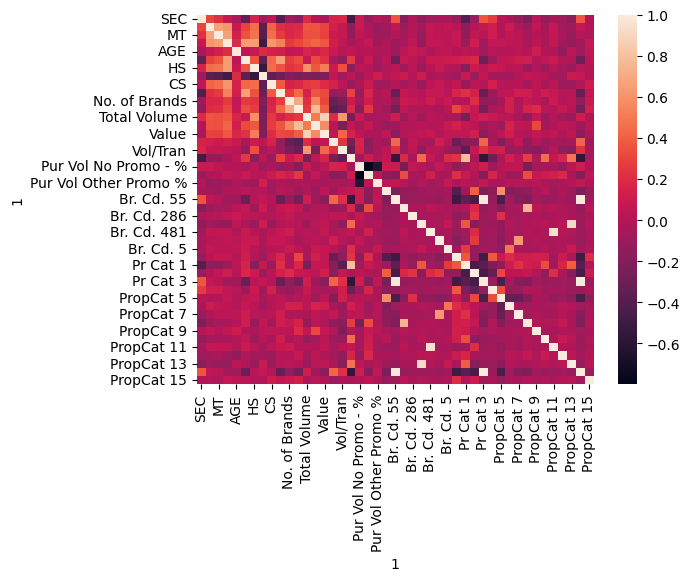

In [128]:
import seaborn as sns 

X = (data - data.mean()) / data.std()
sns.heatmap(X.corr())

### Our correlation heatmap can show us some redundancies in the data and help us decide on which columns to remove or combine in order to minimize the curse of dimensionality. We see very high correlations between Pr Cat 3 and Br. Cd. 55, Pr Cat 3, Trans / Brand Runs and PropCat 13, PropCat 13 and Br. Cd. 55, a few in the column Pur Vol No Promo - %, a few in Pr Cat 3, and a few in PropCat 14. We will remove the columns Pr Cat 3, Br. Cd. 55, PropCat 14, and Pur Vol No Promo - % and see if this helps with the correlation. 

<AxesSubplot: xlabel='1', ylabel='1'>

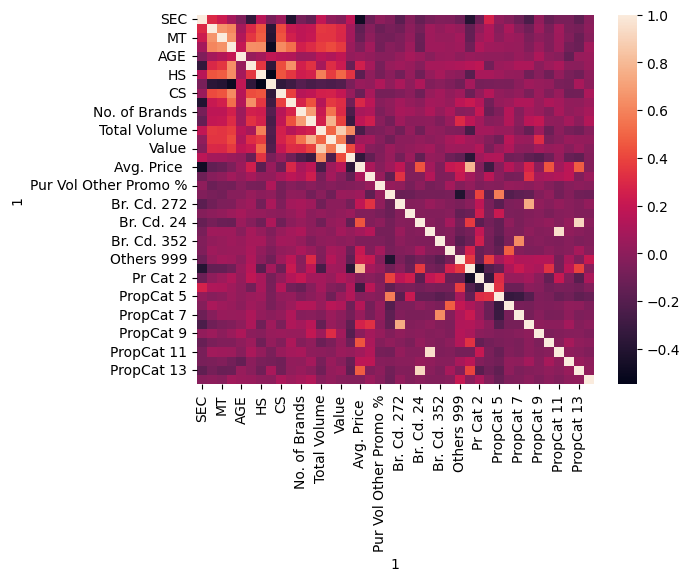

In [129]:
removed = ["Br. Cd. 55","Pr Cat 3","PropCat 14","Pur Vol No Promo - %","Trans / Brand Runs"]
X = X.drop(removed,axis=1)
sns.heatmap(X.corr())

### It looks like we can reduce the dimension with this a bit more. We can remove CHILD, PropCat 5, PropCat 11, Pr Cat 1,Others 999,Pr Cat 1, and SEC as well. 

In [130]:
removed = ["CHILD","Pr Cat 1","PropCat 5","PropCat 11","SEC","Pr Cat 1","Others 999"]
X = X.drop(removed,axis=1)

In [131]:
pca = PCA()
principal_components = pca.fit_transform(X)
comp_names = [f"PC{i+1}" for i in range(principal_components.shape[1])]
principal_df = pd.DataFrame(data=principal_components,columns=comp_names)
principal_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34
0,1.067678,-0.674656,-0.219181,-0.022417,-0.256493,-0.439473,-0.768605,-1.237372,-0.985072,0.763166,...,-0.359189,-0.201162,0.176615,0.371706,-0.993242,-0.733836,-0.237051,-0.177945,0.024566,0.053484
1,-1.143556,0.632564,0.583437,-0.408914,-0.044726,-1.666359,-0.980796,1.533084,0.208521,1.011648,...,0.211198,0.462025,0.143842,-0.071232,0.282958,0.483212,0.241716,-0.199518,-0.095279,-0.044805
2,-2.928274,-0.017873,0.739450,-0.730080,0.591497,-1.476406,0.406509,-0.323465,0.270806,0.207338,...,-0.719267,0.590449,-0.259394,0.417536,-0.400798,0.023267,-0.065062,-0.245596,0.047084,-0.303691
3,5.714130,-1.152686,-0.027737,0.305119,0.996826,-0.780912,-0.114565,-0.545535,-0.367294,-0.424879,...,-0.212421,0.505389,-0.116683,0.175925,-0.225816,-0.406861,-0.014245,-0.241609,0.081110,0.273398
4,1.353569,-2.107732,-0.292800,-2.826239,-1.800842,0.440846,0.326693,-0.054964,0.465105,-0.934245,...,0.021607,-0.348495,0.051053,-0.345980,0.235196,0.121979,-0.082605,0.217538,-0.010975,0.264127


In [132]:
loadings = pd.DataFrame(pca.components_.T,
                        columns=comp_names,
                        index = X.columns)
loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34
1,,,,,,,,,,,,,,,,,,,,,
FEH,-0.274823,-0.110441,0.058023,-0.076642,-0.197399,0.023855,-0.084466,0.017751,-0.091475,0.067087,...,-0.027671,-0.238381,-0.035233,0.168125,-0.091438,-0.033176,0.061445,0.004355,0.001034,-0.003142
MT,-0.286419,-0.100202,0.002058,-0.050137,-0.214443,0.064120,-0.070518,0.036839,-0.061130,0.038132,...,0.292399,0.324625,0.166690,-0.065618,-0.122168,-0.176911,-0.031027,-0.009087,0.011509,0.004428
SEX,-0.354350,-0.040287,-0.043510,0.029666,-0.213587,0.124070,-0.121514,-0.026058,-0.076267,-0.063949,...,-0.182747,-0.120111,-0.039824,-0.318790,0.424177,0.622241,-0.130509,-0.041927,-0.002031,0.010751
AGE,-0.095414,0.010743,0.052475,0.007552,0.009285,0.079755,0.128532,-0.000444,-0.206714,-0.403484,...,-0.088562,-0.040332,-0.002034,0.098313,-0.062533,-0.043434,0.017933,0.024220,0.006799,0.015719
EDU,-0.261336,0.157661,-0.107699,0.176456,-0.190701,0.147850,-0.174820,0.013772,0.000872,-0.041825,...,-0.477819,-0.239961,-0.034408,0.181025,-0.207970,-0.281381,0.020350,-0.024874,0.012792,0.005771
HS,-0.314308,-0.149406,0.055029,-0.002446,0.014555,0.119948,0.022289,0.038322,0.045642,0.039081,...,0.061273,-0.057884,-0.036155,0.109726,-0.152639,-0.196320,0.056899,0.028256,-0.010796,0.022666
CS,-0.261629,-0.062104,-0.051825,-0.033655,-0.277202,0.120472,-0.057876,-0.063485,-0.091938,-0.063290,...,0.140403,-0.041878,0.078968,0.125103,-0.078288,-0.023508,-0.023325,-0.004466,-0.003025,0.012989
Affluence Index,-0.258201,0.190408,-0.088970,0.136361,-0.095129,0.147402,-0.085170,-0.038440,0.099675,-0.099787,...,0.441636,0.391316,-0.110533,-0.120856,0.112823,-0.096872,0.066796,0.032717,-0.008458,-0.039351
No. of Brands,-0.217557,0.207912,-0.031979,0.012060,0.184151,-0.252862,0.004363,-0.080922,-0.113218,0.193093,...,0.276828,-0.346743,0.038559,-0.132284,0.153044,-0.108029,0.144788,0.143831,-0.039191,0.014531


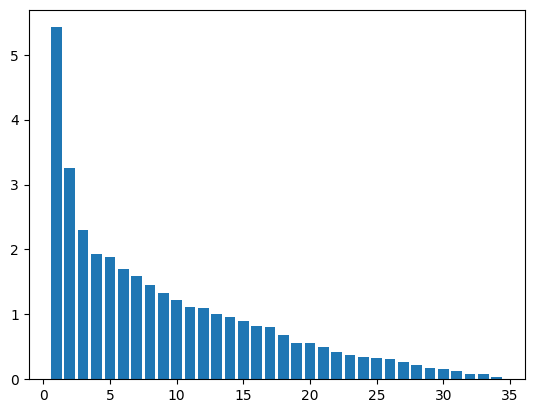

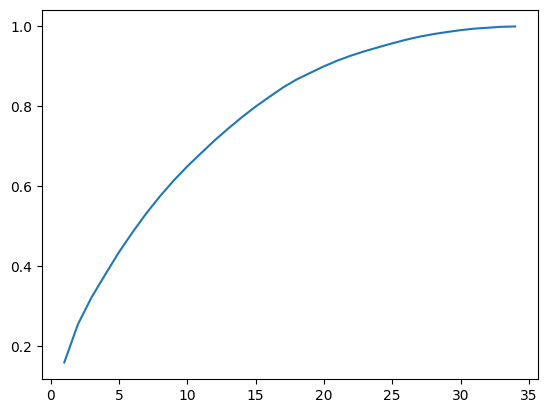

In [133]:
plt.bar(range(1,len(pca.explained_variance_)+1),pca.explained_variance_)
plt.show()
plt.plot(range(1,35),pca.explained_variance_ratio_.cumsum())
plt.show()

### We see that about 80% of the variance is explained by about 15 principal components, and so we will continue with those 15 principal components. 

In [134]:
pca = PCA(n_components=20)
pca.fit(X)
pca_scores = pca.transform(X)

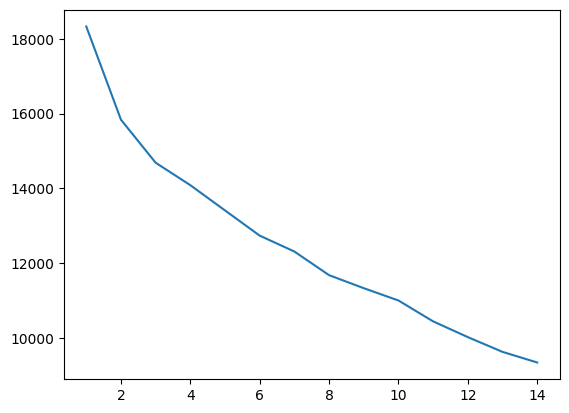

In [135]:
k_values = []
for i in range(1,15):
    kmeans_pca = KMeans(n_clusters=i,n_init="auto",init="k-means++",random_state=40)
    kmeans_pca.fit(pca_scores)
    k_values.append(kmeans_pca.inertia_)
plt.plot(range(1,15),k_values)

### From the KMeans plot above we see the first break occur at about 2, and so we will go with 2 clusters or market segmenets for the rest of this analysis. If we utilize two clusters, this would fall within the suggested 2-5 cluster recommendation. 

In [136]:
kmeans_pca = KMeans(n_clusters=2,n_init="auto",init="k-means++",random_state=40)
kmeans_pca.fit(pca_scores)
df = pd.concat([X.reset_index(drop=True),pd.DataFrame(pca_scores)],axis=1)
df.columns.values[-3:] = ["Component 1","Component 2","Component 3"]
df["Kmeans PCA"] = kmeans_pca.labels_
df.head()

,FEH,MT,SEX,AGE,EDU,HS,CS,Affluence Index,No. of Brands,Brand Runs,...,11,12,13,14,15,16,Component 1,Component 2,Component 3,Kmeans PCA
0,0.838499,0.424172,-1.138508,0.908928,-0.019787,-0.952861,0.134681,-1.316380,-0.403028,0.120073,...,2.396496,0.884023,-1.638171,1.844519,0.810347,0.700642,-0.517722,0.146878,1.068896,0
1,-0.042586,0.424172,0.403489,-1.401905,-0.019787,-0.083330,0.134681,0.173531,0.863028,0.889564,...,-0.070470,0.245060,0.087797,-0.653873,-0.258301,-0.450650,0.773522,0.229997,-0.027046,0
2,0.838499,0.424172,0.403489,0.908928,0.436833,0.786201,0.134681,0.524098,0.863028,2.043801,...,0.195817,-0.330843,-0.005681,-0.231801,0.164420,0.537291,-1.198184,0.071200,-0.709052,0
3,-1.804756,-1.904312,-2.680505,0.908928,-1.846268,-1.822392,-1.836260,-1.491664,-1.036056,-1.130350,...,0.014611,0.534684,-0.611514,-0.503259,0.965948,-0.273994,-0.823866,0.147583,-0.521229,1
4,-0.923671,0.424172,0.403489,-0.246489,-0.019787,-0.083330,0.134681,-0.615245,-0.403028,-0.937978,...,1.083749,-0.333642,2.650518,-1.027301,0.819890,0.435125,0.335502,-0.646697,0.929940,0


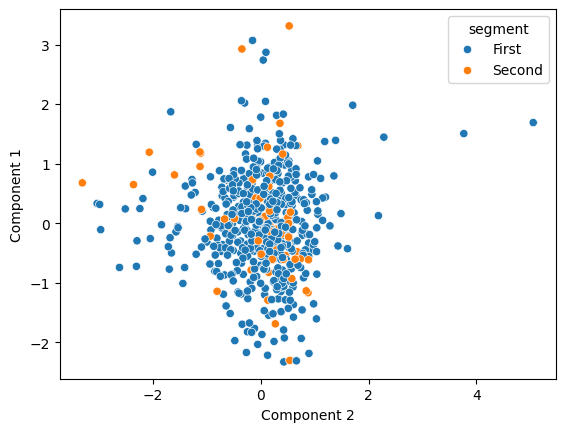

In [137]:
df["segment"] = df["Kmeans PCA"].map({0:"First",1:"Second"})
x_axis = df["Component 2"]
y_axis = df["Component 1"]
sns.scatterplot(x=x_axis,y=y_axis,hue=df["segment"])
plt.show()

### This has not gotten us to a helpful plot as all of the data here seems to be mixed together without a clear differentiation between the groups. Modifying the kmeans to contain 5 groups or 3 groups also does not change the lack of clear clustering. This would mean we have an error in our PCA, or, more than likely, to much noise from the data. We need to find a way to minimize the noise even further. 

### Reviewing the data we still have, perhaps we can attempt to visualize the clusters on a parallel coordinates plot like we did in assignment 4. 

In [138]:
X.columns

Index(['FEH', 'MT', 'SEX', 'AGE', 'EDU', 'HS', 'CS', 'Affluence Index',
       'No. of Brands', 'Brand Runs', 'Total Volume', 'No. of  Trans', 'Value',
       'Vol/Tran', 'Avg. Price ', 'Pur Vol Promo 6 %', 'Pur Vol Other Promo %',
       'Br. Cd. 57, 144', 'Br. Cd. 272', 'Br. Cd. 286', 'Br. Cd. 24',
       'Br. Cd. 481', 'Br. Cd. 352', 'Br. Cd. 5', 'Pr Cat 2', 'Pr Cat 4',
       'PropCat 6', 'PropCat 7', 'PropCat 8', 'PropCat 9', 'PropCat 10',
       'PropCat 12', 'PropCat 13', 'PropCat 15'],
      dtype='object', name=1)

In [139]:
df = df.drop(["Component 1","Component 2","Component 3","Kmeans PCA","segment"],axis=1)
kmeans = KMeans(n_clusters=2)
df.columns = df.columns.astype("str")
kmeans.fit(df)
y = kmeans.fit_predict(df)
df["cluster"] = y
df["cluster"].astype("str")

C:\Users\Joseph\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Joseph\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0      0
1      0
2      0
3      1
4      0
      ..
595    0
596    0
597    0
598    0
599    0
Name: cluster, Length: 600, dtype: object

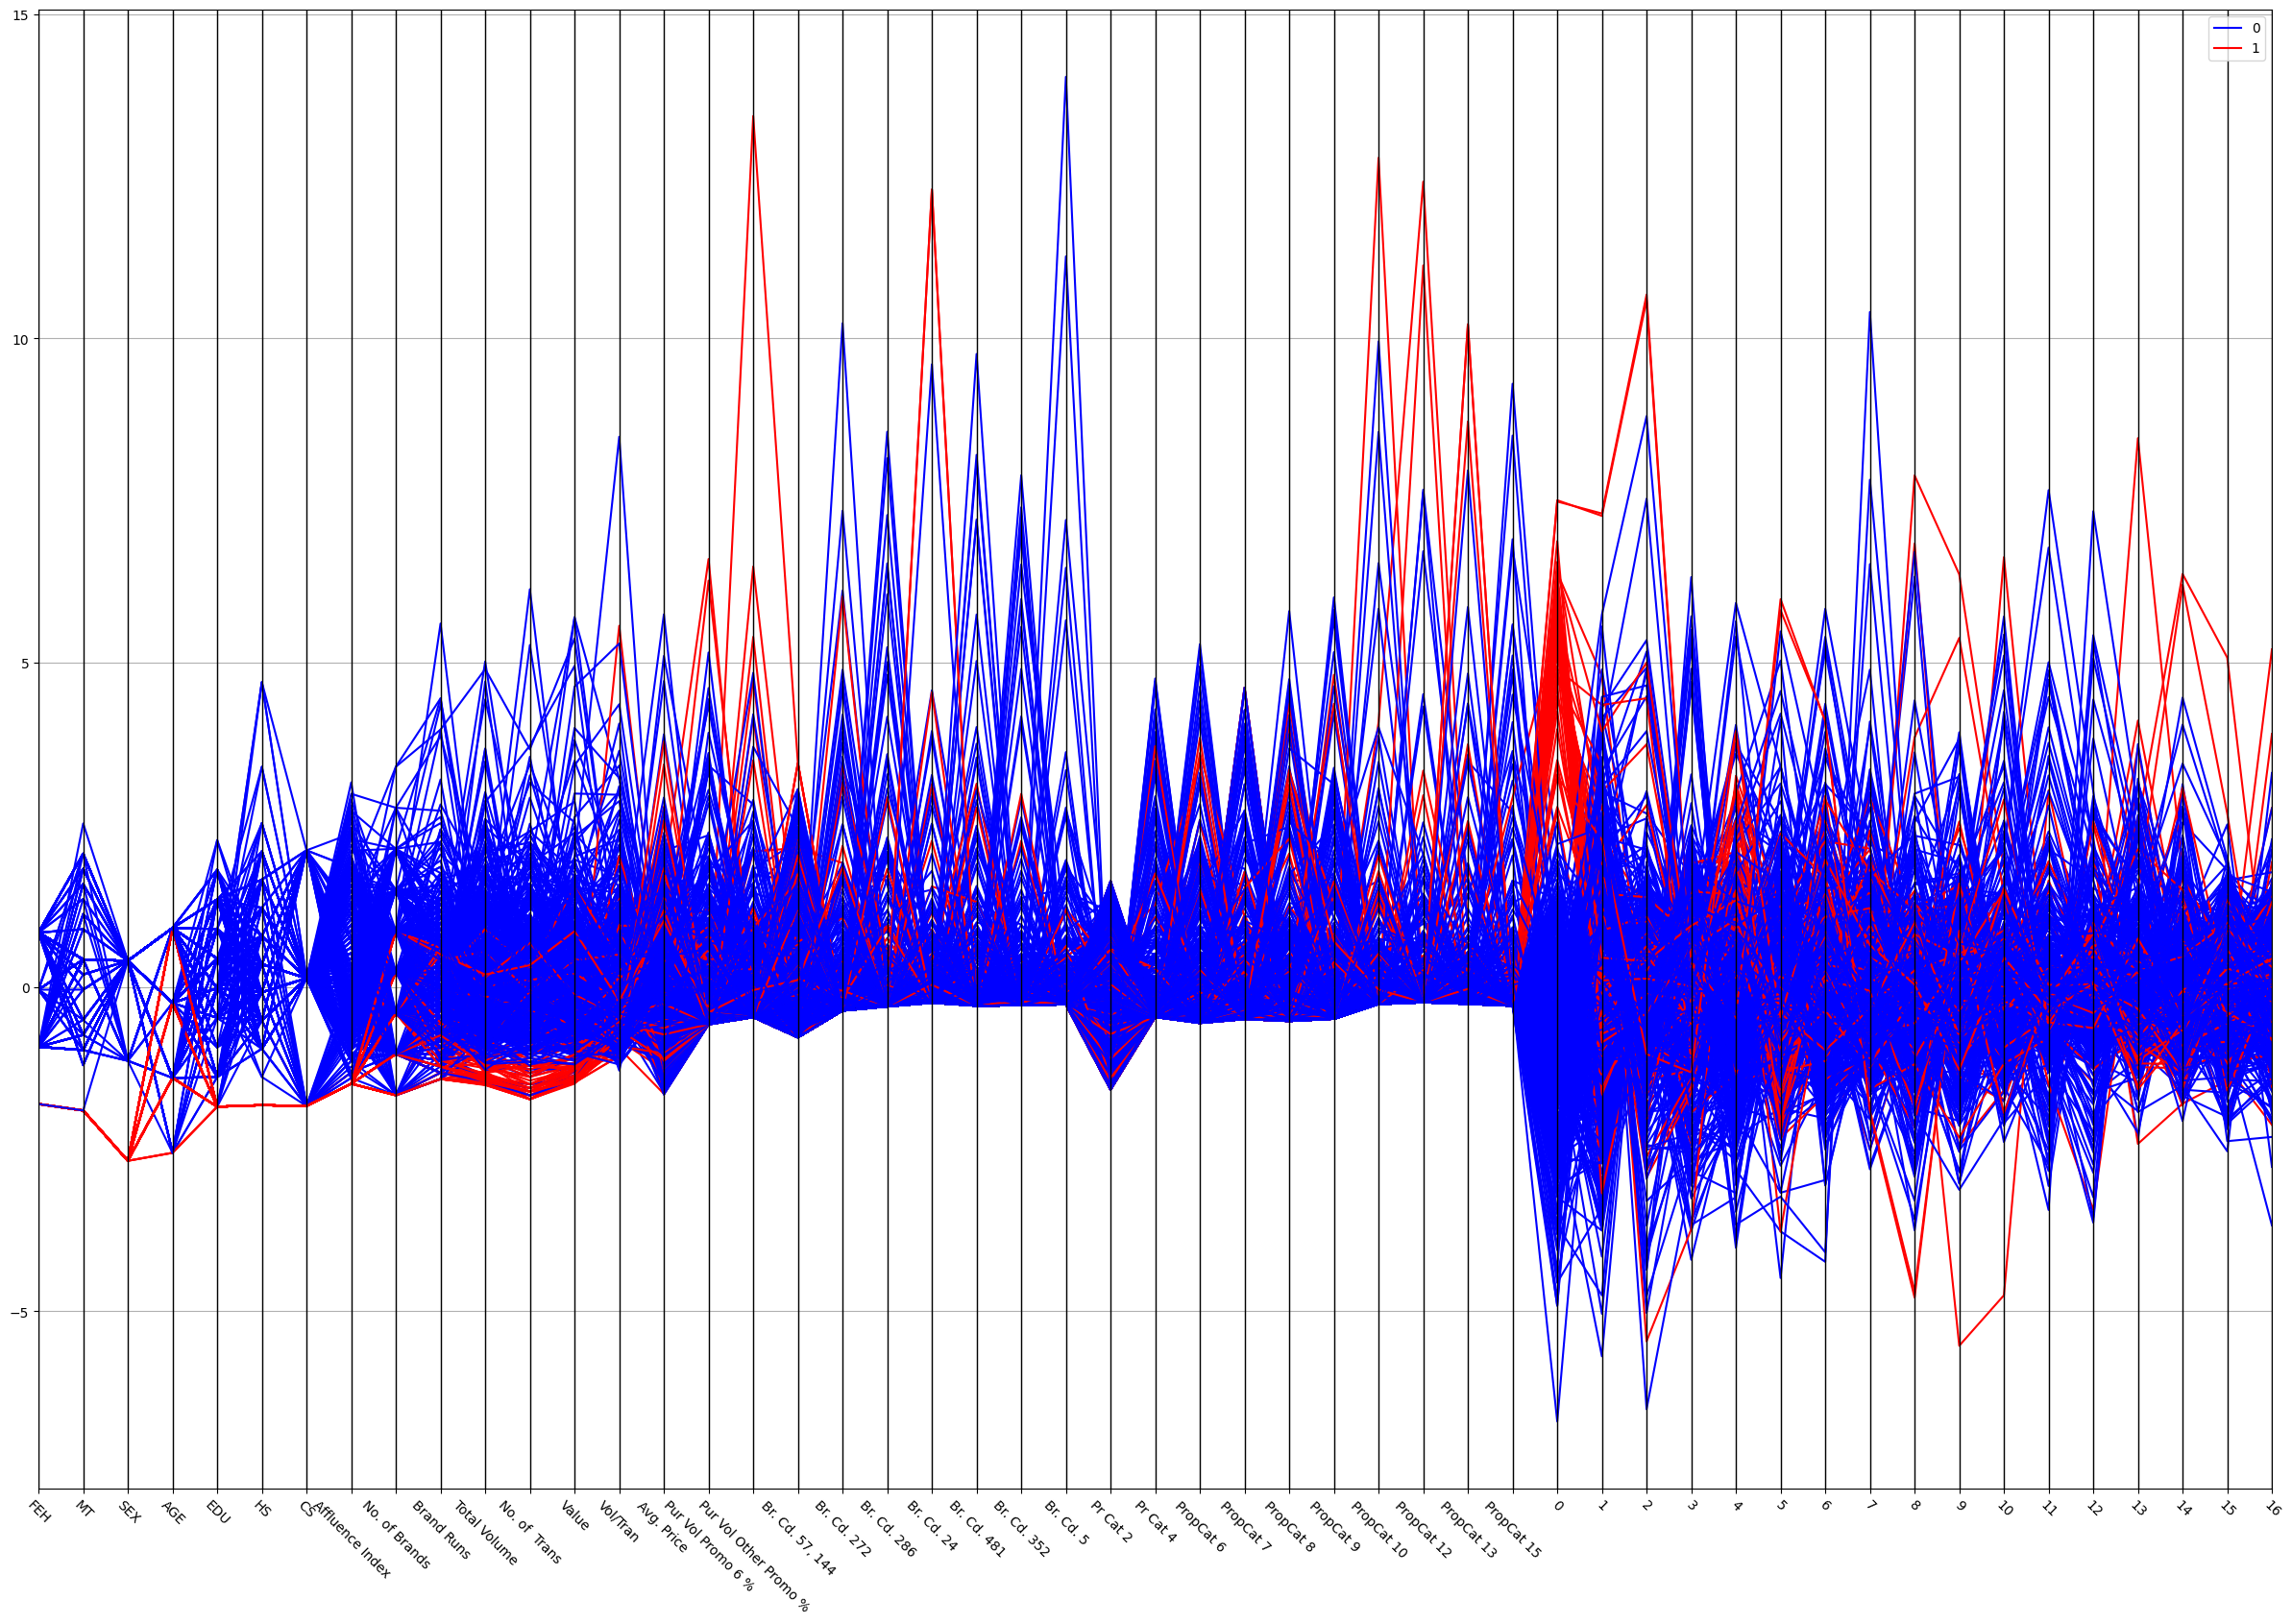

In [142]:
plt.figure(figsize=(30,20))
colors = ["red","blue"]
pd.plotting.parallel_coordinates(df,class_column="cluster",color=colors,sort_labels=True)
plt.xticks(rotation=-45)
plt.show()

### We can see from the red and the blue lines, a little bit of information regarding our clusters, this will be able to help us create a profile for each market segment for the marketing department. 

### Group 0 (Group 1) first: 
### This group is high in Br. Cd. 5, Col/Tran, HS, Br. Cd. 352, Br. Cd. 286, Br. Cd. 272, as well as nearly all the indicators on brands. What this means for us is that group 1 has a preference towards brands 5, 352, 286, and 272. They also have a higher transaction volume than group 2 and seem to purchase at a faster rate than group two. They also have more people per household and win out in all the demographic areas as well. Higher education, larger family, more television availability. 

### Group 1 (Group 2):
### This group is high in Br. Cd. 57 - 144, Br. Cd. 24, PropCat 12,PropCat 13, and PropCat 15. They are lower than group 1 in most other areas with an emphasis in the number of transactions being heavily on the lower side. The age and education also are on the lower side. Less eduation, smaller family, less access to television, less afluent. 

### The strongest distinction in these groups that might be of interest to the marketing team, is that group 1 tends towards purchases under the price category while group 2 tends towards purchases under the product proposition category. There are also some strong brand preferences from each group, which may be helpful to someone trying to market towards the group. 